<a href="https://colab.research.google.com/github/nitinfaye/image-proceesing/blob/main/Implementing_the_Image_Processing_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Implementing the Image Processing Filters

The following is a list of features that you need to implement (listed roughly from easiest to
hardest). Refer to the
http://bit.ly/2IXuKjS
for
more details on the implementation of each filter
and example output images.
##Luminance Operations
Brightness
:
Change the brightness of an image by scaling RGB values by a factor.
Contrast
:
Change the contrast of an image using the method described
in
http://bit.ly/2wWVtrQ
.
##Linear Filtering Operations
Blu
r
: Blur an image by convolving it with a Gaussian low
-
pass filter.
Sharpen
:
Apply a linear sharpening filter to the image.
Edge detect
: Detect edges in an image by convolving it with an edge detection kernel.
##Resampling Operations
Scale
:
Scale an image up
or down in resolution by a real valued factor.
##Composite Operations
Composite
:
Compose one image with a second image using the
over
operator, with a third image
as a matte (alpha).
To get full credit for any of the operations requiring resampling (scale), you must support three
different sampling methods (point, linear, and Gaussian) and compare the results for at least one
example. The sampling method to be used by imgpro is control
led by arguments specified before
the resampling operation on the command line. For example,
imgpro in.jpg out.jpg
-
point_sampling
-
rotate 1
-
gaussian_sampling rotate 3
will rotate the input image by 1 radian using point sampling and then rotate the res
ult by 3
radians using Gaussian sampling. For Gaussian sampling, choose sensible Gaussian filter
dimensions. For scaling, this requires adapting the extent of the Gaussian

#Luminance Operations

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.io import imread
import cv2
import numpy as np
%matplotlib inline
from google.colab.patches import cv2_imshow


##Random Noise

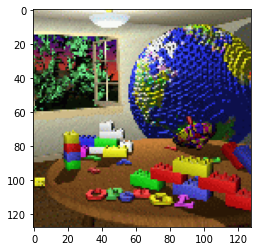

In [2]:
a = imread('/content/noise.png');
#an = imnoise(a,'gaussion',0.01);
plt.imshow(a);
#plt.imshow(an);

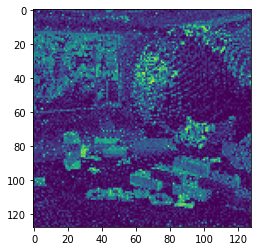

In [3]:
im = Image.open("/content/noise.png")
# convert PIL Image to ndarray
im_arr = np.asarray(im)
# random_noise() method will convert image in [0, 255] to [0, 1.0],
noise_img = random_noise(im_arr, mode='gaussian', var=0.05**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)
#img.show()
plt.imshow(a)
plt.imshow(img)

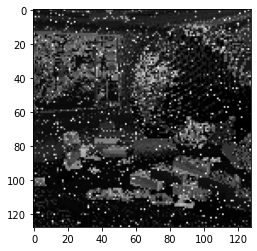

In [4]:
from imgaug import augmenters as iaa
im = Image.open("/content/noise.png")
im_arr = np.asarray(im)

# gaussian noise
# aug = iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)

# salt and pepper noise
aug = iaa.SaltAndPepper(p=0.05)

im_arr = aug.augment_image(im_arr)
im = Image.fromarray(im_arr).convert('RGB')
plt.imshow(im)

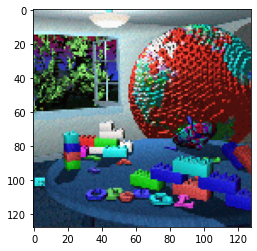

In [5]:
# Adding noise to the image  
img = cv2.imread('/content/noise.png', cv2.IMREAD_COLOR)
im = np.zeros(img.shape, np.uint8) # do not use original image it overwrites the image
mean = 0
sigma = 10
cv2.randn(im,mean,sigma) # create the random distribution
Fruit_Noise = cv2.add(img, im) # add the noise to the original image
plt.imshow(Fruit_Noise, cmap='gray')

##Brightness

Text(0.5, 1.0, 'bright')

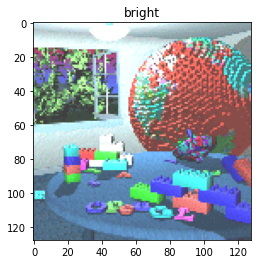

In [6]:
bright_matrix= np.ones(img.shape,dtype ="uint8")*60
bright_image1= cv2.add(img, bright_matrix)
plt.imshow(bright_image1)
plt.title("bright")

Text(0.5, 1.0, 'Dark')

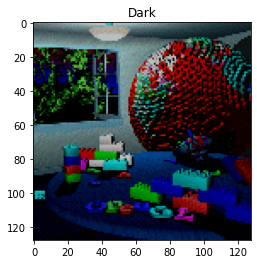

In [7]:
bright_image2= cv2.subtract(img, bright_matrix)
plt.imshow(bright_image2)
plt.title("Dark")

##Contrast

Text(0.5, 1.0, 'contrast')

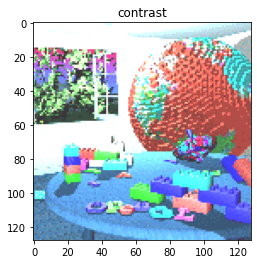

In [8]:
bright_image3 = cv2.convertScaleAbs(img, alpha=1.7, beta=50)
plt.imshow(bright_image3)
plt.title("contrast")

##Saturation

Text(0.5, 1.0, 'saturation')

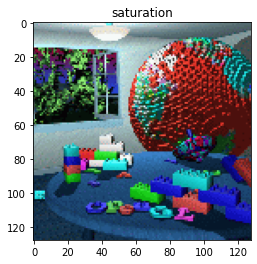

In [9]:
#image4= cv2.imread('/content/noise.png', cv2.IMREAD_COLOR).astype(np.float32) / 255.0
image4= img.astype(np.float32) / 255.0
plt.imshow(image4)
plt.title("saturation")

#Linear Filtering Operations

##Blur 

Text(0.5, 1.0, 'blurred image')

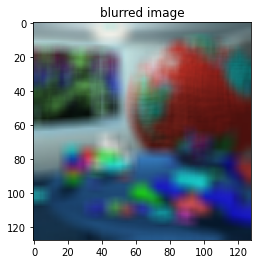

In [10]:
blurImg = cv2.blur(img,(8,8)) 
plt.imshow(blurImg)
plt.title('blurred image')

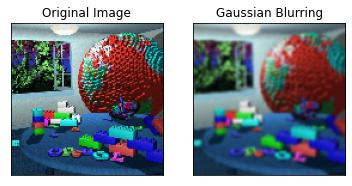

In [11]:
# Gaussian Blurring
# Again, you can change the kernel size
gausBlur = cv2.GaussianBlur(img, (5,5),0) 
#plt.imshow(gausBlur)
#plt.title('Gaussian Blurring')
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gausBlur,cmap = 'gray')
plt.title('Gaussian Blurring'), plt.xticks([]), plt.yticks([])
plt.show()

##Edge detect 

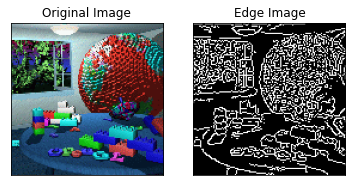

In [12]:
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#Resampling Operations

##scalling

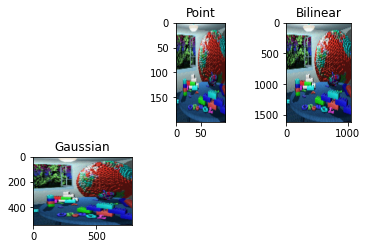

In [13]:
Point = cv2.resize(img, (100, 200), fx = 0.1, fy = 0.1)
Bilinear = cv2.resize(img, (1050, 1610))
 
Gaussian = cv2.resize(img, (780, 540),np.sum([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8],[1/16, 1/8, 1/16]]))# 3*3 kernel
 
Titles =["Point", "Bilinear", "Gaussian"]
images =[Point, Bilinear, Gaussian]
count = 3
 
for i in range(count):
    plt.subplot(2, 3, i + 2)
    plt.title(Titles[i])
    plt.imshow(images[i])
 
plt.show()

#Composite Operations

##Composite

(<matplotlib.axes._subplots.AxesSubplot at 0x7f498df50b90>,
 <matplotlib.image.AxesImage at 0x7f498dee1410>)

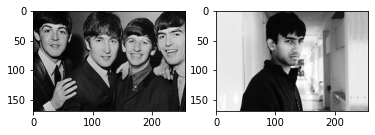

In [14]:
from PIL import Image, ImageDraw, ImageFilter

im1 = Image.open('/content/comp_background.jpg')
im2 = Image.open('/content/comp_foreground 1.jpg').resize(im1.size)
plt.subplot(121),plt.imshow(im1),
plt.subplot(122),plt.imshow(im2)

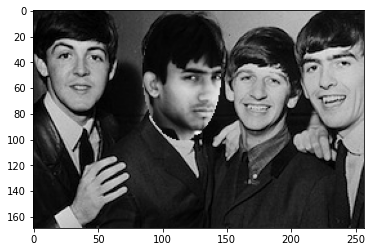

In [16]:
mask = Image.new("L", im1.size,255)
draw = ImageDraw.Draw(mask)
draw.ellipse((85, 0, 145, 100), fill=0)
im = Image.composite(im1, im2, mask)
plt.imshow(im)

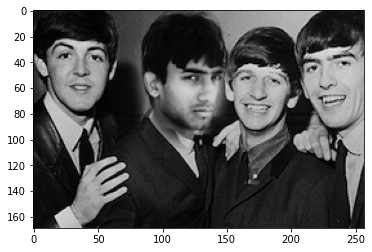

In [19]:
mask_blur = mask.filter(ImageFilter.GaussianBlur(5))
im = Image.composite(im1, im2, mask_blur)
plt.imshow(im)